In [13]:
import hvplot.pandas
import pandas as pd
import requests
import matplotlib.pyplot as plt

import time
from scipy.stats import linregress

In [14]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
movies_df = pd.read_csv("IMDB Movies 2000 - 2020_clean_Jas.csv")

# Display sample data
movies_df.head()

,original_title,year,genre,duration,country,language_1,director,writer,actors,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,USA Profit
0,Kate & Leopold,2001,"Comedy, Fantasy, Romance",118,USA,English,James Mangold,"Steven Rogers, James Mangold","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859,-878141
1,Glitter,2001,"Drama, Music, Romance",104,USA,English,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier","Mariah Carey, Max Beesley, Da Brat, Tia Texada...",Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407,-17725593
2,Chicken Run,2000,"Animation, Adventure, Comedy",84,"UK, USA, France",English,"Peter Lord, Nick Park","Peter Lord, Nick Park","Phil Daniels, Lynn Ferguson, Mel Gibson, Tony ...",Phil Daniels,"Phil Daniels, Lynn Ferguson",When a cockerel apparently flies into a chicke...,When a cockerel apparently flies,7.0,173987,45000000,106834564,61834564
3,Fantastic Four,2005,"Action, Adventure, Fantasy",106,"USA, Germany",English,Tim Story,"Mark Frost, Michael France","Ioan Gruffudd, Jessica Alba, Chris Evans, Mich...",Ioan Gruffudd,"Ioan Gruffudd, Jessica Alba",A group of astronauts gain superpowers after a...,A group of astronauts gain superpowers,5.7,307944,100000000,154696080,54696080
4,Frida,2002,"Biography, Drama, Romance",123,"Mexico, USA, Canada",English,Julie Taymor,"Hayden Herrera, Clancy Sigal","Salma Hayek, Mía Maestro, Amelia Zapata, Aleja...",Salma Hayek,"Salma Hayek, Mía Maestro","A biography of artist Frida Kahlo, who channel...","A biography of artist Frida Kahlo,",7.4,79690,12000000,25885000,13885000


## Average rating of all movies for each year

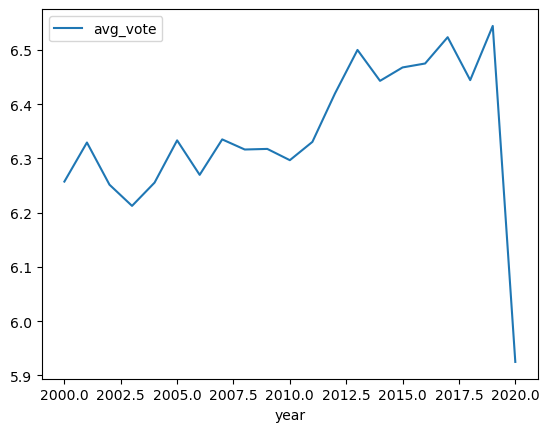

In [15]:
#groupby year to get the average of desired column

avg_vote = movies_df.groupby("year")["avg_vote"].mean()

#turn function into a DataFrame

avg_vote_df = pd.DataFrame(avg_vote)

#plot using matplotlib

lines = avg_vote_df.plot.line()

## Average profit of each movie by year

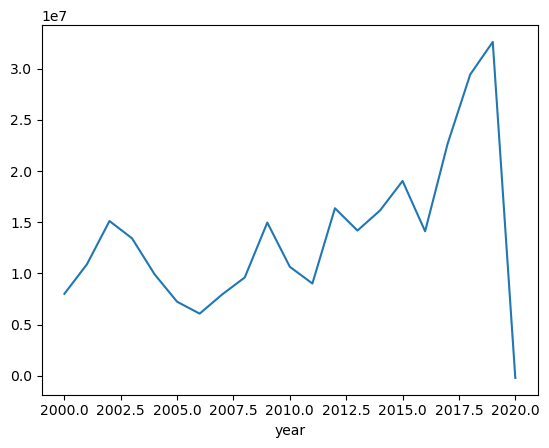

In [16]:
#groupby year to get the average of desired column

avg_profit = movies_df.groupby("year")["USA Profit"].mean()

#turn function into a DataFrame

avg_profit_df = pd.DataFrame(avg_profit)

avg_profit_df = avg_profit_df["USA Profit"].astype('int64')

#plot using matplotlib

lines = avg_profit_df.plot.line()

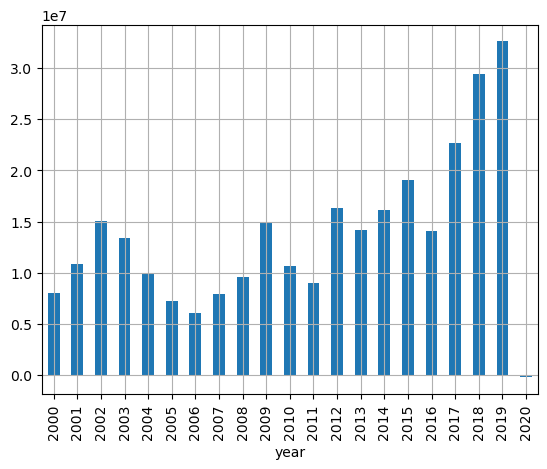

In [17]:
avg_profit_df.plot(kind="bar", x="year", y="USA Profit", grid=True)

plt.show()

## Average Budget of all movies in year

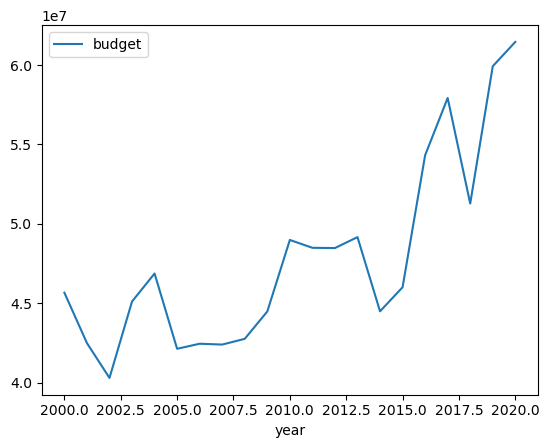

In [18]:
#groupby year to get the average of desired column

avg_budget = movies_df.groupby("year")["budget"].mean()

#turn function into a DataFrame

avg_budget_df = pd.DataFrame(avg_budget)

#plot using matplotlib

lines = avg_budget_df.plot.line()

## Total Profit

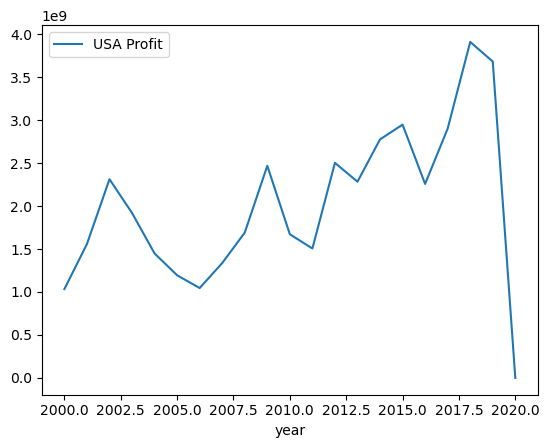

In [19]:
Total_profit = movies_df.groupby("year")["USA Profit"].sum()

#turn function into a DataFrame

Total_profit_df = pd.DataFrame(Total_profit)

#plot using matplotlib

lines = Total_profit_df.plot.line()

## Total Budget

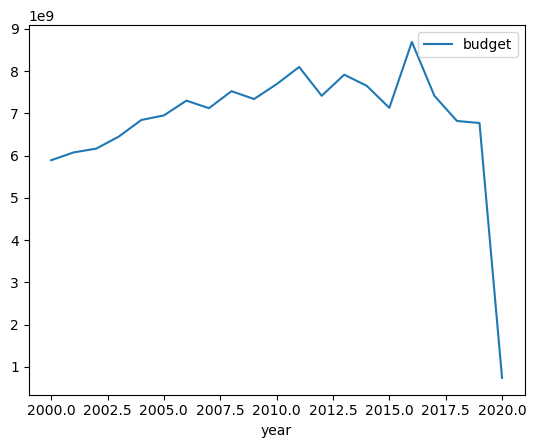

In [20]:
total_budget = movies_df.groupby("year")["budget"].sum()

#turn function into a DataFrame

total_budget_df = pd.DataFrame(total_budget)

#plot using matplotlib

lines = total_budget_df.plot.line()

R squared: 0.06884937240960291


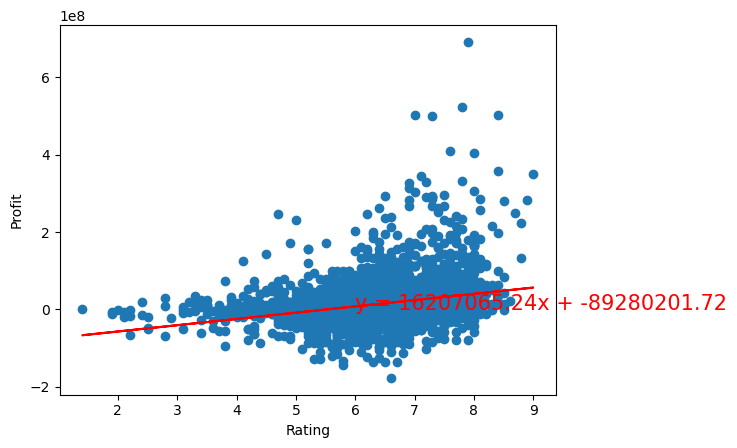

In [21]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["avg_vote"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Rating')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.02513494504320212


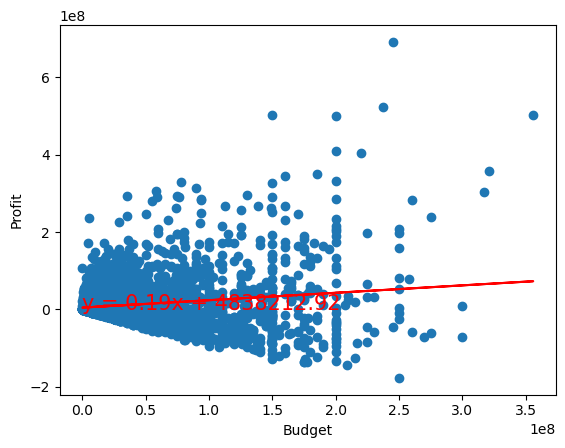

In [23]:
 ## Convert to floats and store Poverty Rate and Bank Count as x and y values
x_values = movies_df["budget"].astype("float")
y_values = movies_df["USA Profit"].astype("float")

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Budget')
plt.ylabel('Profit')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()